<a href="https://www.kaggle.com/code/abednegodikko/stackoverflow-survey-2022?scriptVersionId=133995600" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EXPLORATORY DATA ANALYSIS

### Exploring dataset from the StackOverflow developers survey 2022


# Introduction
>This is an analysis project using the survey dataset from StackOverflow for the year 2022. These surveys are carried out each year by StackOverflow. CLick [here](https://insights.stackoverflow.com/survey) to check out the dataset used for this project or survey datasets for previous years.

### Getting and loading the survey dataset
There are other ways of getting datasets for projects. One way you can download the data file from the internet is by using the `retrieve()` function which is part of the `urllib.request` module. Read more on that [here](https://docs.org/3/library/urllib.request.html) to get more insight.

For this project, I've downloaded the survey dataset onto my PC and will upload it onto my jupyter notebook using the Jupyter's GUI.

Using the pandas `load_csv()`, we can load the CSV files contained in our uploaded survey folder, but firstly, lets import the pandas library.

In [1]:
import pandas as pd

In [2]:
raw_survey_df = pd.read_csv('/kaggle/input/stack-overflow/survey_results_public.csv')

In [3]:
raw_survey_df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN



The survey dataset comprises of a little more than 73,000 from 78 questions ( exluding the  first column since its just IDs asigned to respondents). Some of questions are required and some also are optional(as stated on the README file) and the data doesn't contain any personal information (to maintain anonymity)

In [4]:
raw_survey_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

From the list of columns in the survey dataset, it is noticeable to see that short codes have been used as column names to represent each question.

The schema file can be used to see the full texts of each question.

Uploaded the schema file as a pandas series. The schema for this survey has multiple columns and some are of not much use to this work. The two columns used are the `qname` column which serves as the index and the `question` column for the value.

In [5]:
schema_path = '/kaggle/input/stack-overflow/survey_results_schema.csv'

In [6]:
raw_schema = pd.read_csv(schema_path, index_col = 'qname').question

In [7]:
raw_schema.sample(4)

qname
NEWSOSites      Which of the following Stack Overflow sites ha...
MetaInfo                                        Browser Meta Info
Blockchain      How favorable are you about blockchain, crypto...
SurveyLength    How do you feel about the length of the survey...
Name: question, dtype: object

In [8]:
raw_schema['Employment']

'Which of the following best describes your current employment status?'

With that, the survey dataset and relevant files for further analysis has been uploaded and converted to dataframes appropriately and ready for further exploration.

## Data Preparation and Cleaning

The survey dataset contains a wide range of information that could be analyzed. But in this project, a few areas was focused on:
- Demographics of respondents
- Employment-related information and respondent opinions
- Working experience
- Distribution of work programming skills and tools preferences


Going by the areas of concentration for this project, i selected a subset of columns with the data that will be relevant for my analysis

In [9]:
rel_columns = [
    #demographics
    'Age', 'Gender', 'Country',
    
    #Employment_related information
    'Employment', 'RemoteWork', 
    'CompTotal', 'CompFreq',
    'OrgSize', 'Onboarding', 
    'TrueFalse_1', 'TrueFalse_2', 'TrueFalse_3',
    
    #Experience
    'WorkExp', 'YearsCode', 'YearsCodePro','EdLevel',
    
    #programming skills and tools
    'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 
    'PlatformHaveWorkedWith',
    'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
    'OfficeStackSyncHaveWorkedWith',
    'SOVisitFreq', 'Blockchain',
   
    
]

I selected 24 relevant columns to be used for this analysis

In [10]:
len(rel_columns)

24

In other to avoid tampering the raw data incase of any mistake, I made a copy of the `raw_survey_df` and pass in the selected column

In [11]:
survey_df = raw_survey_df[rel_columns].copy()

Here are some basic information of the cleaned dataset

In [12]:
survey_df.shape

(73268, 24)

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             70946 non-null  object 
 1   Gender                          70853 non-null  object 
 2   Country                         71771 non-null  object 
 3   Employment                      71709 non-null  object 
 4   RemoteWork                      58958 non-null  object 
 5   CompTotal                       38422 non-null  float64
 6   CompFreq                        44425 non-null  object 
 7   OrgSize                         51039 non-null  object 
 8   Onboarding                      35679 non-null  object 
 9   TrueFalse_1                     35819 non-null  object 
 10  TrueFalse_2                     35715 non-null  object 
 11  TrueFalse_3                     35749 non-null  object 
 12  WorkExp                         

Some of the columnns in the dataset are asigned the _object_ data type. This is of no issue if dealing with _string_ types but will definitely be an issue when running some numerical calculations.

I manually adjusted the data type for each column on a case-by-case basis by converting some of the columns into numerical data type.

In [14]:
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')

The values for some columns such as the gender columns are too many which could make our visualization noisy. Best to only have maximum of 3 values and the values with multiple selection asign the numpy _nan_

In [15]:
import numpy as np

In [16]:
survey_df.loc[(survey_df['Gender'] != 'Man') & 
              (survey_df['Gender'] != 'Woman') &
              (survey_df['Gender'] != 'Non-binary, genderqueer, or gender non-conforming'), 'Gender'] = np.nan

Now the dataset is cleaned and ready for Exploratory analysis

In [17]:
survey_df.sample(3)

,Age,Gender,Country,Employment,RemoteWork,CompTotal,CompFreq,OrgSize,Onboarding,TrueFalse_1,...,YearsCodePro,EdLevel,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,SOVisitFreq,Blockchain
67451,Under 18 years old,Woman,Armenia,"Employed, full-time",Fully remote,NaN,Weekly,500 to 999 employees,Somewhat long,Yes,...,25.0,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN,Linux-based;macOS;Windows,NaN,NaN,A few times per month or weekly,Indifferent
25107,25-34 years old,NaN,United Kingdom of Great Britain and Northern I...,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Some college/university study without earning ...,C++;HTML/CSS;JavaScript;Python,NaN,NaN,Linux-based;macOS,NaN,NaN,A few times per week,Unfavorable
4982,25-34 years old,Man,United Kingdom of Great Britain and Northern I...,"Employed, full-time","Hybrid (some remote, some in-person)",60000.0,Yearly,"5,000 to 9,999 employees",Somewhat long,Yes,...,3.0,"Other doctoral degree (Ph.D., Ed.D., etc.)",C++;Java;MATLAB,NaN,NaN,Linux-based,Confluence;Jira Work Management,Microsoft Teams,Less than once per month or monthly,Very unfavorable


# Exploratory Analysis

Inport `matplotlib.pyplot`, `matplotlib` and `seaborn` for visualizations

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (8, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['font.size'] = 12

Since this is a survey with respondents from different part of the world, it's best to look at the demographics of respondents

***Starting with the country demography of respondents***

In [19]:
survey_df['Country'].nunique()

180

There 180 unique countries where respondents live at

We can get the total number of respondents from each country using the `value_counts` method then plot a graph of countries with most respondents

In [20]:
survey_df['Country'].value_counts()     #counts the numbers of respondents in each country

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
                                                        ...  
Monaco                                                      1
Djibouti                                                    1
Seychelles                                                  1
Solomon Islands                                             1
Saint Kitts and Nevis                                       1
Name: Country, Length: 180, dtype: int64

In [21]:
top_countries = survey_df['Country'].value_counts().head(20)  #get the top countries with most respondents

In [22]:
top_countries

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Switzerland                                               932
Austria 

Some of the countries names are too long, therefore let's shorten then to avoid issues in our visualization. We can achieve this usin the `replace()` method 

In [23]:
survey_df['Country'] = survey_df['Country'].replace(['United States of America'], 'USA')
survey_df['Country'] = survey_df['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'], 'UK')
survey_df['Country'] = survey_df['Country'].replace(['Russian Federation'], 'Russia')
survey_df['Country'] = survey_df['Country'].replace(['Iran, Islamic Republic of...'], 'Iran')

We can plot a bar chart for `top_countries` using the index as _x-axis_ and the values in the series as the _y-axis_

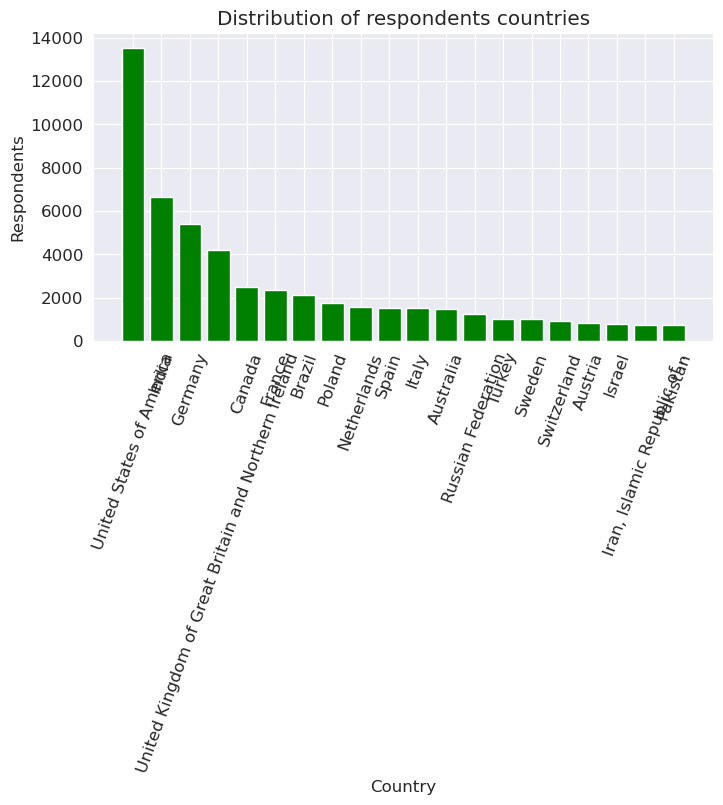

In [24]:
plt.figure(figsize = (8,4))
plt.title('Distribution of respondents countries')
plt.xlabel('Country')
plt.ylabel('Respondents')
plt.xticks(rotation = 70);
plt.bar(top_countries.index, top_countries.values, fc='green');

***Age demography of respondents***

We can get the counts of correspondents age by age group from the dataset

In [25]:
age_count = survey_df.Age.value_counts()
age_count

25-34 years old       28112
18-24 years old       16646
35-44 years old       13988
45-54 years old        5281
Under 18 years old     3866
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Name: Age, dtype: int64

We can then plot a graph to show distribution of respondents for various age groups using barplot from the `Seaborn` module

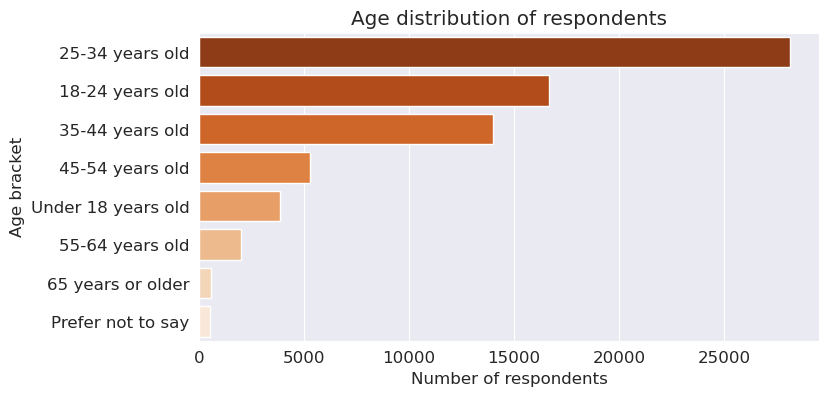

In [26]:
plt.title('Age distribution of respondents')
plt.xlabel('Number of respondents')
plt.ylabel('Age bracket')
sns.barplot(x=age_count.values,
            y=age_count.index,
            palette = 'Oranges_r',
            order=age_count.index);

From the chart above, it is clear that a wide margin of respondents for the survey are from the age bracket of 25 to 34 years followeed by 18 to 24 years. This is an interesting outcome which can prove that more young people are more interested in tech these days.

***Gender demographics***

We need to find how well the various gender are represented in the survey carried out. Lets plot a pie chart to gain more insight.

In [27]:
survey_df.Gender.value_counts()

Man                                                  64607
Woman                                                 3399
Non-binary, genderqueer, or gender non-conforming      704
Name: Gender, dtype: int64

In [28]:
gender_count=survey_df.Gender.value_counts()

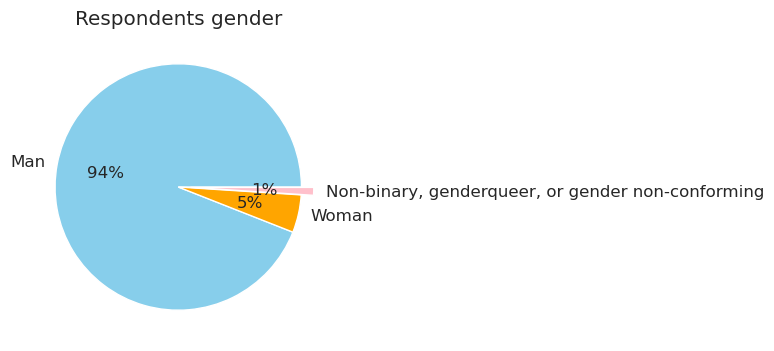

In [29]:
plt.figure(facecolor='white')
plt.title('Respondents gender')
plt.pie(gender_count.values,
        labels= gender_count.index,
        autopct='%1.0f%%',
        colors = ['skyblue', 'orange', 'pink'], 
        explode = (.0, .0, .1,));

It is evident that the women and other gender types are less represented in tech in comparison with their male counterpart in tech. This deduction however is from the data obtained from this survey only as it could be subject to selection bias

***Let's explore the working situation of respondents***

In [30]:
survey_df.RemoteWork.value_counts()

Fully remote                            25341
Hybrid (some remote, some in-person)    25021
Full in-person                           8596
Name: RemoteWork, dtype: int64

There are three types of working situations that respondents chose from. Either remote, or hybrid or full time.

Let's plot a horizontal bar chart with seaborn to see more into the work situation of respondents

In [31]:
survey_df['RemoteWork'] = survey_df['RemoteWork'].replace(['Hybrid (some remote, some in-person)'], 'Hybrid')

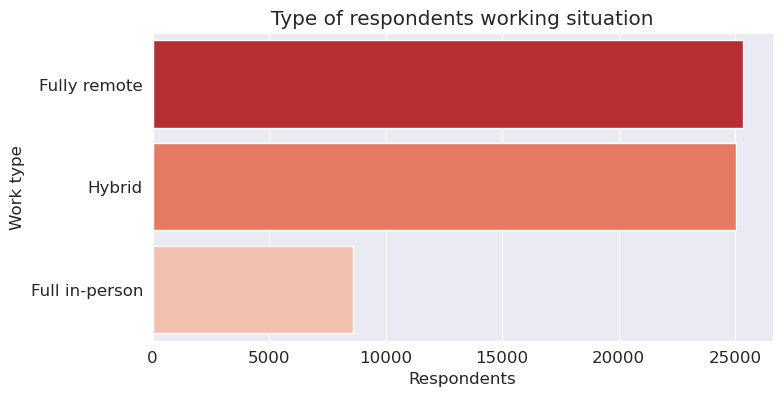

In [32]:
sns.countplot(y=survey_df.RemoteWork, width = .85, palette = 'Reds_r')
plt.title('Type of respondents working situation')
plt.ylabel('Work type')
plt.xlabel('Respondents');

From the graph above, we can see that more people are working remotely while closely followed are those with hybrid working situation. Full in-person is drastically low. This could be an after effect of the post Covid-19 pandemic which made people to continue works from home rather than going to offices. Another reason could be the global employment pattern whereby a techie can work remotely for any company in the world from any part of the world.

Let's get the percentge of respondents work situation

In [33]:
work_perc = survey_df.RemoteWork.value_counts() * 100 / survey_df.RemoteWork.count()

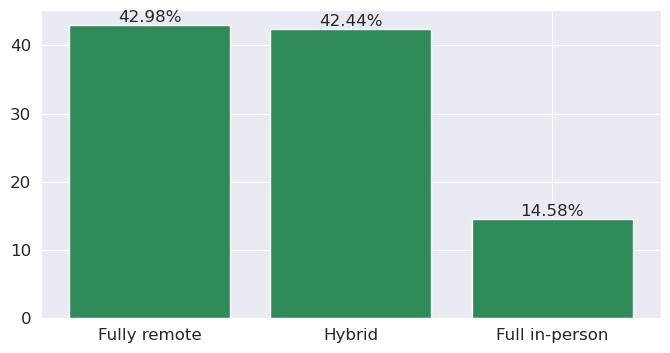

In [34]:
axa=plt.bar(work_perc.index, work_perc, facecolor = 'seagreen')

for p in axa:
    height = p.get_height()
    plt.annotate('{}%'.format(round(height,2)),(p.get_x() + p.get_width()/2, height),
                 ha = 'center',
                 va = 'bottom')

***Lets explore the education of respondents***

In [35]:
survey_df.EdLevel.unique()

array([nan, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)'], dtype=object)

In [36]:
ed_count = survey_df.EdLevel.value_counts()

In [37]:
ed_count

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Some college/university study without earning a degree                                 9326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Associate degree (A.A., A.S., etc.)                                                    2236
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Something else                                                                         1247
Professional degree (JD, MD, etc.)                                                     1121
Name: EdLevel, dtype: int64

In [38]:
ed_perc = survey_df.EdLevel.value_counts() * 100 / survey_df.EdLevel.count() 

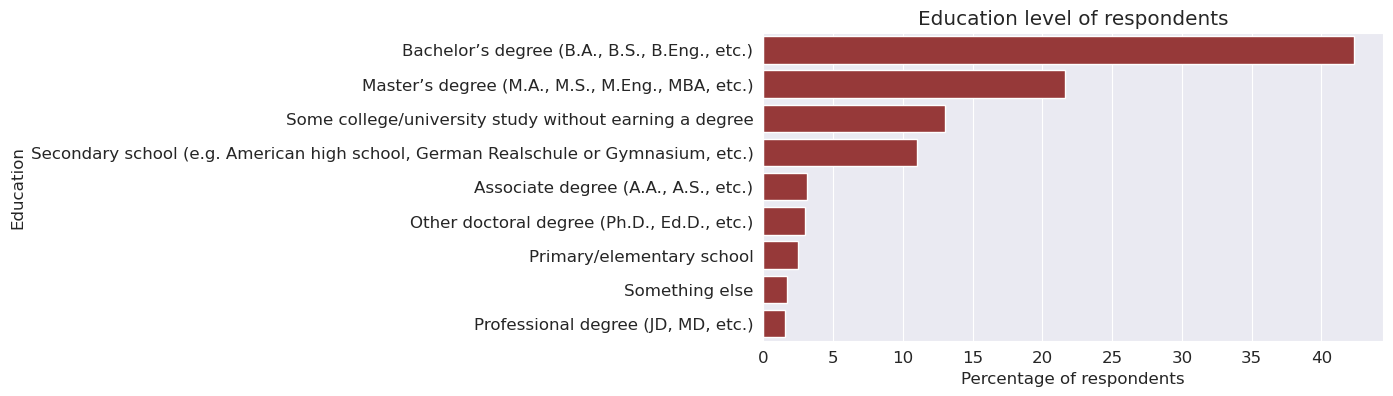

In [39]:
plt.title('Education level of respondents')
plt.xlabel('Percentage of respondents')
plt.ylabel('Education')
sns.barplot(x=ed_perc.values,
            y=ed_count.index,
            color = 'brown',
            order=ed_count.index);

***Let's look at the languages used or worked with by respondents***

Now the interesting thing here is that some respomdents selected more than one language they work with hence the number or unique selection is above 2,000

In [40]:
survey_df.LanguageHaveWorkedWith.value_counts()

HTML/CSS;JavaScript;TypeScript                                                              1250
Python                                                                                       962
HTML/CSS;JavaScript                                                                          914
HTML/CSS;JavaScript;PHP;SQL                                                                  745
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                        570
                                                                                            ... 
C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript                                               1
C++;HTML/CSS;JavaScript;Python;Solidity;SQL                                                    1
Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript                                                    1
Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lua;Perl;PHP;Python;Ruby;Rust;SQL;TypeScript       1
C#;JavaScript;Lua;PowerShell;S

We can see that 1250 respondents picked HTML/CSS;JavaScript;TypeScript together and others picked up multiple other choices. This cannot help us to accurately find out singular languages that had the most picks by developers

We will need to do more procesing by taking the `LanguageHaveWorkedWith` column containing the list of values seperated by semi-colons(;) and split it into multiple columns

To do that, we're going to define a helper function which turns a column containing lists of values into a dataframe with one column for each possible option

In [41]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    #iterate over the column
    for idx, value in col_series[col_series.notnull()].items():
        #break each value into list of options
        for option in value.split(';'):
            #add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            #mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

With the defined helper function above, we can use it on any column with multiple containig a list of values seperated by a semi-colon into a dataframe 

In [42]:
language_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)

In [43]:
language_df

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,Lua,PHP,...,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,True,True,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
73264,True,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
73266,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


From the `language_df` output, we can see that the `LanguageHaveWorkedWith` column of `survey_df` using the helper function now has 42 different columns with each option occupying one column

If a respondent has selected the option, the value in the column  is `True` else the value is `False`.

With that, we can now use the column-wise total (since we know Truety values represent 1 and Falsy values represents 0) to get the most common languages used by developers.

In [44]:
language_sum = language_df.sum().sort_values(ascending=False)

In [45]:
language_sum

JavaScript     46443
HTML/CSS       39142
SQL            35127
Python         34155
TypeScript     24752
Java           23644
Bash/Shell     20656
C#             19883
C++            16024
PHP            14827
C              13692
PowerShell      8575
Go              7922
Rust            6625
Kotlin          6507
Dart            4648
Ruby            4299
Assembly        3887
Swift           3489
R               3308
VBA             3185
MATLAB          2913
Lua             2867
Groovy          2357
Delphi          2311
Scala           1837
Objective-C     1698
Perl            1644
Haskell         1577
Elixir          1528
Julia           1084
Clojure         1070
Solidity        1031
LISP             932
F#               730
Fortran          646
Erlang           641
APL              504
COBOL            464
SAS              435
OCaml            422
Crystal          340
dtype: int64

From the result, seems like deevelopers use more of Javascript for extensive development work in over the past year.

We can plot a graph to visualize the top 15 languages used by developers in the past year

In [46]:
top_languages = language_sum.head(15)
top_languages

JavaScript    46443
HTML/CSS      39142
SQL           35127
Python        34155
TypeScript    24752
Java          23644
Bash/Shell    20656
C#            19883
C++           16024
PHP           14827
C             13692
PowerShell     8575
Go             7922
Rust           6625
Kotlin         6507
dtype: int64

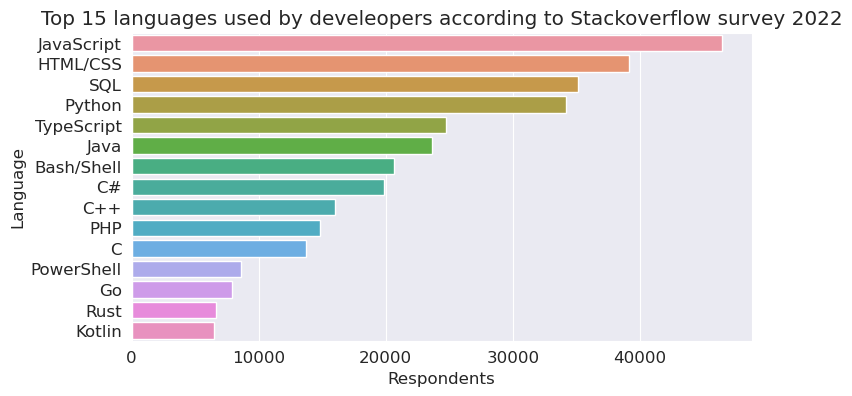

In [47]:
plt.title('Top 15 languages used by develeopers according to Stackoverflow survey 2022')
plt.ylabel('Language')
plt.xlabel('Respondents')
sns.barplot(y=top_languages.index,
            x=top_languages.values
           );

## Let's Answer some relatable questions

***Q1: Which countries has the highest number of coding experience at professional work level? Considering countries with more than 500 responses only.***

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to include the countries with more than 500 respondents.

In [48]:
countries_df = survey_df.groupby('Country')[['YearsCodePro']].mean().sort_values('YearsCodePro', ascending=False)

In [49]:
countries_df

,YearsCodePro
Country,
Antigua and Barbuda,33.00
San Marino,30.00
Timor-Leste,20.50
Bahamas,19.00
Libyan Arab Jamahiriya,16.75
...,...
Niger,NaN
North Korea,NaN
Papua New Guinea,NaN


Sort to include only countries with over 500 respndents

In [50]:
high_countries_df =countries_df.loc[survey_df.Country.value_counts()>500].head(15)

In [51]:
high_countries_df

,YearsCodePro
Country,
Australia,14.216466
USA,12.910900
UK,12.389846
Italy,11.854015
Sweden,11.697201
Canada,11.542169
Denmark,11.535980
Switzerland,11.308642
Netherlands,11.285714


For countries with more than 500 respondents, Australia has the highest average years of coding experience at professional level folloerd by USA, UK, Italy, Sweden and Canada.

With only Australia being the outlier, there's not much significant difference in the coding years experience at professional level for all the top 15 countries.